In [4]:
import pandas as pd
import numpy as np

df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [5]:
df.drop(df[df['Borough']=="Not assigned"].index,axis=0, inplace=True)
df1 = df.reset_index()
df2= df1.groupby('Postal Code').agg(lambda x: ','.join(x))
df2.shape

(103, 2)

In [6]:
df2.loc[df2['Neighbourhood']=="Not assigned",'Neighbourhood']=df2.loc[df2['Neighbourhood']=="Not assigned",'Borough']

In [7]:
df3 = df2.reset_index()
df3['Borough']= df3['Borough'].str.replace('nan|[{}\s]','').str.split(',').apply(set).str.join(',').str.strip(',').str.replace(",{2,}",",")
df3

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [8]:
df3.shape

(103, 3)

In [9]:
df_geo_coor = pd.read_csv("http://cocl.us/Geospatial_data")
df_geo_coor.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
df_toronto = pd.merge(df, df_geo_coor, how='left', left_on = 'Postal Code', right_on = 'Postal Code')
df_toronto.head(15)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [21]:
df_toronto_neigh = df_toronto.groupby(['Neighbourhood']).mean()
df_toronto_neigh

,Latitude,Longitude
Neighbourhood,,
Agincourt,43.794200,-79.262029
"Alderwood, Long Branch",43.602414,-79.543484
"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
Bayview Village,43.786947,-79.385975
"Bedford Park, Lawrence Manor East",43.733283,-79.419750
Berczy Park,43.644771,-79.373306
"Birch Cliff, Cliffside West",43.692657,-79.264848
"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",43.662744,-79.321558


In [23]:
df_toronto_kmeans = df_toronto_neigh[['Longitude', 'Latitude']]
df_toronto_kmeans
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(df_toronto_kmeans)
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

,Longitude,Latitude
Neighbourhood,,
Agincourt,-79.262029,43.794200
"Alderwood, Long Branch",-79.543484,43.602414
"Bathurst Manor, Wilson Heights, Downsview North",-79.442259,43.754328
Bayview Village,-79.385975,43.786947
"Bedford Park, Lawrence Manor East",-79.419750,43.733283
Berczy Park,-79.373306,43.644771
"Birch Cliff, Cliffside West",-79.264848,43.692657
"Brockton, Parkdale Village, Exhibition Place",-79.428191,43.636847
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",-79.321558,43.662744


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 2,
       0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

array([[-79.38884568,  43.6888214 ],
       [-79.52180436,  43.68055098],
       [-79.26924577,  43.7595681 ]])

Text(0.5, 1.0, 'Toronto Neighborhoods')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

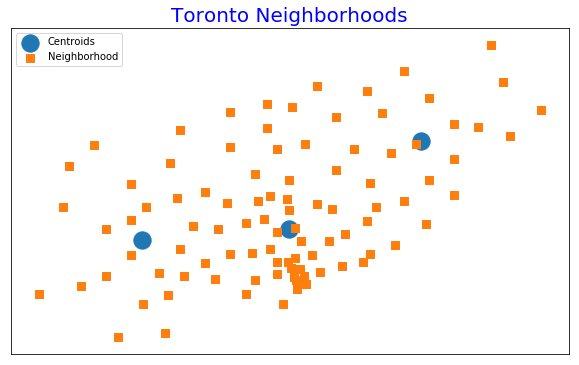

In [24]:
fig = plt.figure(figsize=(10, 6))
x, y = k_means_cluster_centers.T
plt.scatter(x,y, label="Centroids", s=300)

plt.scatter(df_toronto_neigh['Longitude'], df_toronto_neigh['Latitude'], label='Neighborhood', marker='s', s=75)

plt.title('Toronto Neighborhoods', fontsize=20, color='blue')
plt.xticks(())
plt.yticks(())
plt.legend(loc=2)
plt.show()